In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../data/hemp-gcms-threshold10-transpose.xlsx')
df

,Type1,Vitamin E succinate (calcium),Clionasterol,Gluco-octonic acid lactone,Guanosine,THC (Dronabino),Cannabidiol (CBD),Linoleic acid (omega-6),"Linoleic acid, ethyl ester","Linoleic acid, glyceryl ester","Linolenic acid, ethyl ester","Oleic acid, ethyl ester","Oleic acid, trans",Palmitic acid
0,1,12.63,15.35,0.00,0.00,0.0,0.00,20.09,0.00,0.00,0.00,0.00,16.42,0.00
1,1,0.00,0.00,0.00,0.00,0.0,0.00,22.93,0.00,0.00,0.00,0.00,0.00,0.00
2,1,0.00,0.00,0.00,0.00,0.0,0.00,35.13,10.36,0.00,12.27,0.00,0.00,0.00
3,1,0.00,0.00,0.00,0.00,0.0,0.00,86.53,0.00,0.00,0.00,0.00,0.00,0.00
4,1,0.00,0.00,0.00,0.00,0.0,0.00,66.24,0.00,0.00,0.00,0.00,0.00,0.00
5,1,0.00,0.00,0.00,0.00,0.0,0.00,34.08,20.61,0.00,0.00,13.02,0.00,0.00
6,2,14.16,29.07,0.00,0.00,0.0,13.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,2,0.00,0.00,0.00,0.00,0.0,0.00,17.63,0.00,0.00,0.00,0.00,0.00,10.21
8,2,0.00,0.00,0.00,0.00,0.0,0.00,15.04,11.49,15.12,0.00,10.72,0.00,0.00
9,2,15.10,22.32,0.00,0.00,18.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [3]:
column_name = df.columns
column_name

Index(['Type1', 'Vitamin E succinate (calcium)', 'Clionasterol',
       'Gluco-octonic acid lactone', 'Guanosine', 'THC (Dronabino)',
       'Cannabidiol (CBD)', 'Linoleic acid (omega-6)',
       'Linoleic acid, ethyl ester', 'Linoleic acid, glyceryl ester',
       'Linolenic acid, ethyl ester', 'Oleic acid, ethyl ester',
       'Oleic acid, trans', 'Palmitic acid'],
      dtype='object')

In [4]:
df_type=df['Type1']
df_type

0     1
1     1
2     1
3     1
4     1
5     1
6     2
7     2
8     2
9     2
10    2
11    2
Name: Type1, dtype: int64

In [5]:
df_features = df.drop('Type1', axis=1)
df_features

,Vitamin E succinate (calcium),Clionasterol,Gluco-octonic acid lactone,Guanosine,THC (Dronabino),Cannabidiol (CBD),Linoleic acid (omega-6),"Linoleic acid, ethyl ester","Linoleic acid, glyceryl ester","Linolenic acid, ethyl ester","Oleic acid, ethyl ester","Oleic acid, trans",Palmitic acid
0,12.63,15.35,0.00,0.00,0.0,0.00,20.09,0.00,0.00,0.00,0.00,16.42,0.00
1,0.00,0.00,0.00,0.00,0.0,0.00,22.93,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.0,0.00,35.13,10.36,0.00,12.27,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.0,0.00,86.53,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.0,0.00,66.24,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.0,0.00,34.08,20.61,0.00,0.00,13.02,0.00,0.00
6,14.16,29.07,0.00,0.00,0.0,13.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.0,0.00,17.63,0.00,0.00,0.00,0.00,0.00,10.21
8,0.00,0.00,0.00,0.00,0.0,0.00,15.04,11.49,15.12,0.00,10.72,0.00,0.00
9,15.10,22.32,0.00,0.00,18.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)
scaled_data

array([[ 1.50620343,  0.85863422, -0.30151134, -0.30151134, -0.30151134,
        -0.30151134, -0.17874035, -0.54070047, -0.30151134, -0.30151134,
        -0.44471607,  3.31662479, -0.30151134],
       [-0.5753156 , -0.6615544 , -0.30151134, -0.30151134, -0.30151134,
        -0.30151134, -0.07109817, -0.54070047, -0.30151134, -0.30151134,
        -0.44471607, -0.30151134, -0.30151134],
       [-0.5753156 , -0.6615544 , -0.30151134, -0.30151134, -0.30151134,
        -0.30151134,  0.3913084 ,  1.04243383, -0.30151134,  3.31662479,
        -0.44471607, -0.30151134, -0.30151134],
       [-0.5753156 , -0.6615544 , -0.30151134, -0.30151134, -0.30151134,
        -0.30151134,  2.33948031, -0.54070047, -0.30151134, -0.30151134,
        -0.44471607, -0.30151134, -0.30151134],
       [-0.5753156 , -0.6615544 , -0.30151134, -0.30151134, -0.30151134,
        -0.30151134,  1.57044514, -0.54070047, -0.30151134, -0.30151134,
        -0.44471607, -0.30151134, -0.30151134],
       [-0.5753156 , -0.661554

In [7]:
label_encoder = LabelEncoder()
hemp_type_encoded = label_encoder.fit_transform(df_type)
hemp_type_encoded

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [8]:
pls = PLSRegression(n_components=2)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
SSE = 0
SSO = 0

for train_index, test_index in kf.split(scaled_data):
    X_train, X_test = scaled_data[train_index], scaled_data[test_index]
    Y_train, Y_test = hemp_type_encoded[train_index], hemp_type_encoded[test_index]
    
    
    pls.fit(X_train, Y_train)
    
    
    Y_pred = pls.predict(X_test)
    
    
    SSE += np.sum((Y_test - Y_pred) ** 2)
    SSO += np.sum((Y_test - np.mean(Y_train)) ** 2)

In [9]:
pls_da = PLSRegression(n_components=2)
X_scores, Y_scores = pls_da.fit_transform(scaled_data, hemp_type_encoded)


pls_da_scores = X_scores


pls_da_loadings = pls_da.x_weights_

print("PLS-DA Component Loadings:")
print(pls_da_loadings)


feature_importance = np.sum(np.square(pls_da_loadings), axis=0)
print("Sum of Squared Loadings (Feature Importance) for Each Component:")
print(feature_importance)

PLS-DA Component Loadings:
[[-0.18357408 -0.46040956]
 [-0.32808418 -0.27522669]
 [-0.24234105 -0.03889423]
 [-0.24234105 -0.03889423]
 [-0.24234105 -0.13597006]
 [-0.24234105 -0.19667683]
 [ 0.58980918 -0.05316056]
 [ 0.19938342  0.19239755]
 [-0.24234105  0.48477372]
 [ 0.24234105  0.07023359]
 [ 0.03463006  0.25449059]
 [ 0.24234105 -0.4172292 ]
 [-0.24234105  0.36530988]]
Sum of Squared Loadings (Feature Importance) for Each Component:
[1. 1.]


In [15]:
Q2 = 1 - (SSE / SSO)
print(f"Q^2 value: {Q2:.4f}")

Q^2 value: 0.3733


In [12]:
y_pred = pls_da.predict(scaled_data)

In [16]:
r2 = r2_score(hemp_type_encoded, y_pred)
print(f"R^2: {r2:.4f}")

R^2: 0.8827


In [14]:
pls_da_df = pd.DataFrame(data=pls_da_scores, columns=['PLS1', 'PLS2'])
pls_da_df['Hemp type'] = df_type
pls_da_df

,PLS1,PLS2,Hemp type
0,0.365989,-2.725751,1
1,0.430642,0.003150,1
2,1.833470,-0.116425,1
3,1.791894,-0.731802,1
4,1.357621,-0.497334,1
5,1.367546,0.853529,1
6,-2.214120,-1.231703,2
7,-0.522289,1.707452,2
8,-0.162650,2.875117,2
9,-2.031366,-0.995745,2


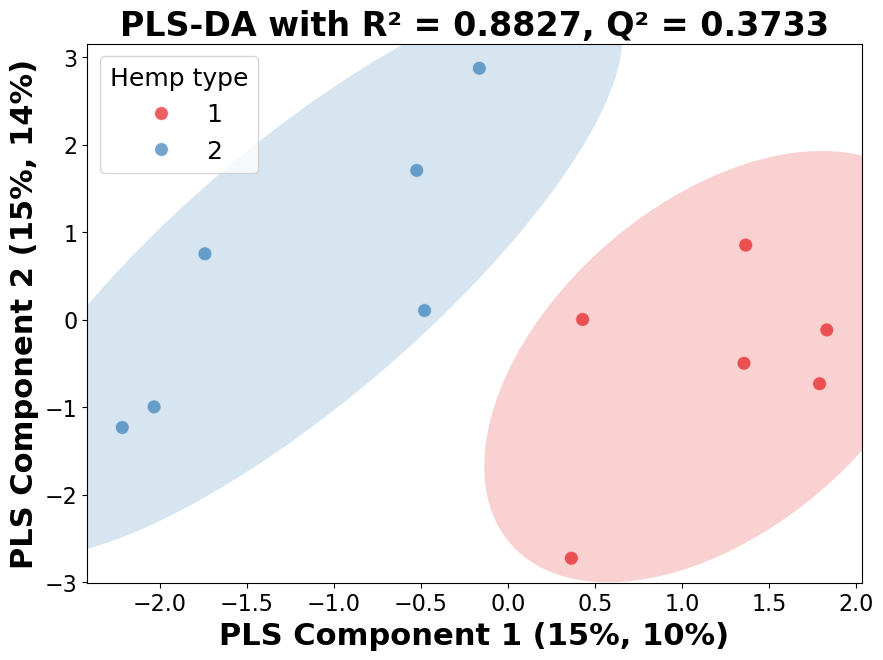

In [17]:
def confidence_ellipse(x, y, ax, n_std=2, facecolor='none', **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    mean = np.mean(x), np.mean(y)

    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
                      width=ell_radius_x * 2.05,
                      height=ell_radius_y * 2.05,
                      facecolor=facecolor, alpha=0.2,
                      **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean[0], mean[1])

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


plt.figure(figsize=(10, 7))
axis = plt.gca()  # Get the current axis for adding ellipses


colors = sns.color_palette("Set1", len(df['Type1'].unique()))


sns.scatterplot(data=pls_da_df, x='PLS1', y='PLS2', hue='Hemp type', palette=colors, alpha=0.7, s=100)


labels = pls_da_df['Hemp type'].unique()
for i, label in enumerate(labels):
    color = colors[i]
    confidence_ellipse(pls_da_df[pls_da_df['Hemp type'] == label]['PLS1'],
                       pls_da_df[pls_da_df['Hemp type'] == label]['PLS2'],
                       axis, edgecolor=color, linewidth=0, facecolor=color)

plt.title(f'PLS-DA with R² = {r2:.4f}, Q² = {Q2:.4f}', fontsize=24, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('PLS Component 1 (15%, 10%)', fontsize=22, fontweight='bold')
plt.ylabel('PLS Component 2 (15%, 14%)', fontsize=22, fontweight='bold')
plt.grid(False)
plt.legend(title='Hemp type', fontsize=18, title_fontsize=18)
#plt.savefig('rev_fig3_left.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
X_var_explained = np.var(pls_da.x_scores_, axis=0) / np.sum(np.var(scaled_data, axis=0))
Y_var_explained = np.var(pls_da.y_scores_, axis=0) / np.sum(np.var(hemp_type_encoded, axis=0))

print(f"Variance Explained in X by each component: {X_var_explained}")
print(f"Variance Explained in Y by each component: {Y_var_explained}")


cumulative_X_var_explained = np.cumsum(X_var_explained)
cumulative_Y_var_explained = np.cumsum(Y_var_explained)

print(f"Cumulative Variance Explained in X: {cumulative_X_var_explained}")
print(f"Cumulative Variance Explained in Y: {cumulative_Y_var_explained}")

Variance Explained in X by each component: [0.14862754 0.14887431]
Variance Explained in Y by each component: [10.52399186 13.86383399]
Cumulative Variance Explained in X: [0.14862754 0.29750185]
Cumulative Variance Explained in Y: [10.52399186 24.38782586]


In [19]:
X_loadings = pls_da.x_loadings_
Y_loadings = pls_da.y_loadings_


X_loadings_df = pd.DataFrame(X_loadings, columns=[f'PLS_Component_{i+1}' for i in range(pls_da.n_components)], index=df.columns[1:])
Y_loadings_df = pd.DataFrame(Y_loadings, columns=[f'PLS_Component_{i+1}' for i in range(pls_da.n_components)], index=['Type1'])

print("X Loadings:")
print(X_loadings_df)
print("\nY Loadings:")
print(Y_loadings_df)

X Loadings:
                               PLS_Component_1  PLS_Component_2
Vitamin E succinate (calcium)        -0.390656        -0.454552
Clionasterol                         -0.451875        -0.401956
Gluco-octonic acid lactone           -0.259835         0.112440
Guanosine                            -0.259835         0.112440
THC (Dronabino)                      -0.303497        -0.148523
Cannabidiol (CBD)                    -0.330802        -0.183718
Linoleic acid (omega-6)               0.565899        -0.082207
Linoleic acid, ethyl ester            0.285919         0.311332
Linoleic acid, glyceryl ester        -0.024301         0.428846
Linolenic acid, ethyl ester           0.273931        -0.017366
Oleic acid, ethyl ester               0.149094         0.388609
Oleic acid, trans                     0.054681        -0.406567
Palmitic acid                        -0.078033         0.254680

Y Loadings:
       PLS_Component_1  PLS_Component_2
Type1        -0.590263         0.265047

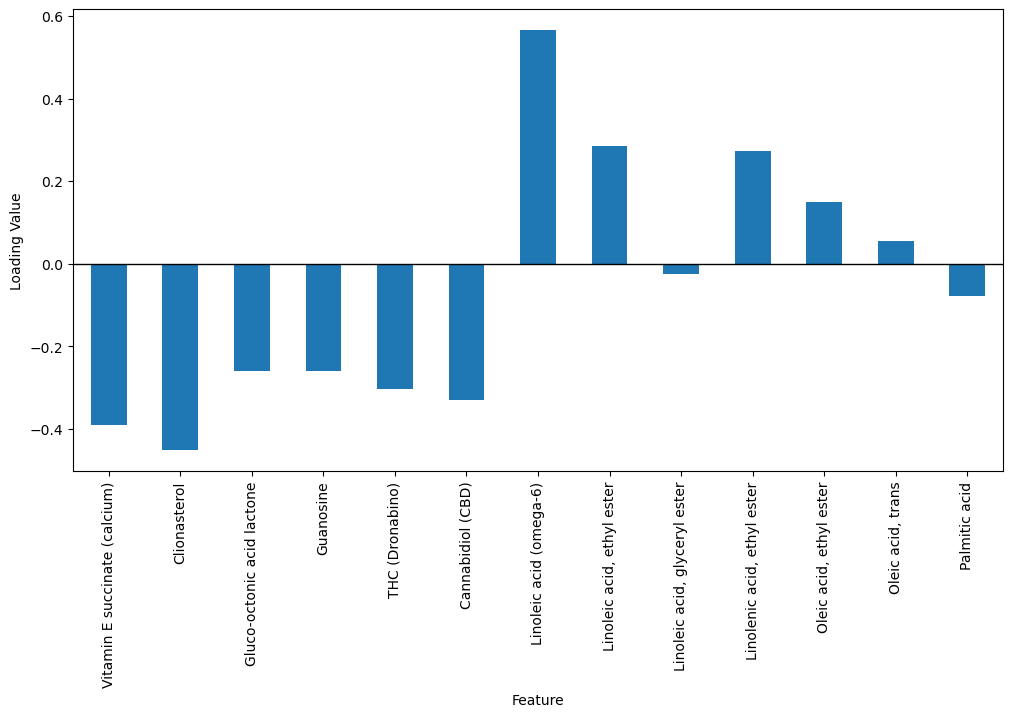

In [20]:
plt.figure(figsize=(12, 6))
X_loadings_df['PLS_Component_1'].plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.grid(False)
#plt.savefig('clustermap10p-pls-da-loading-PLS1.png', dpi=300, bbox_inches='tight')
plt.show()

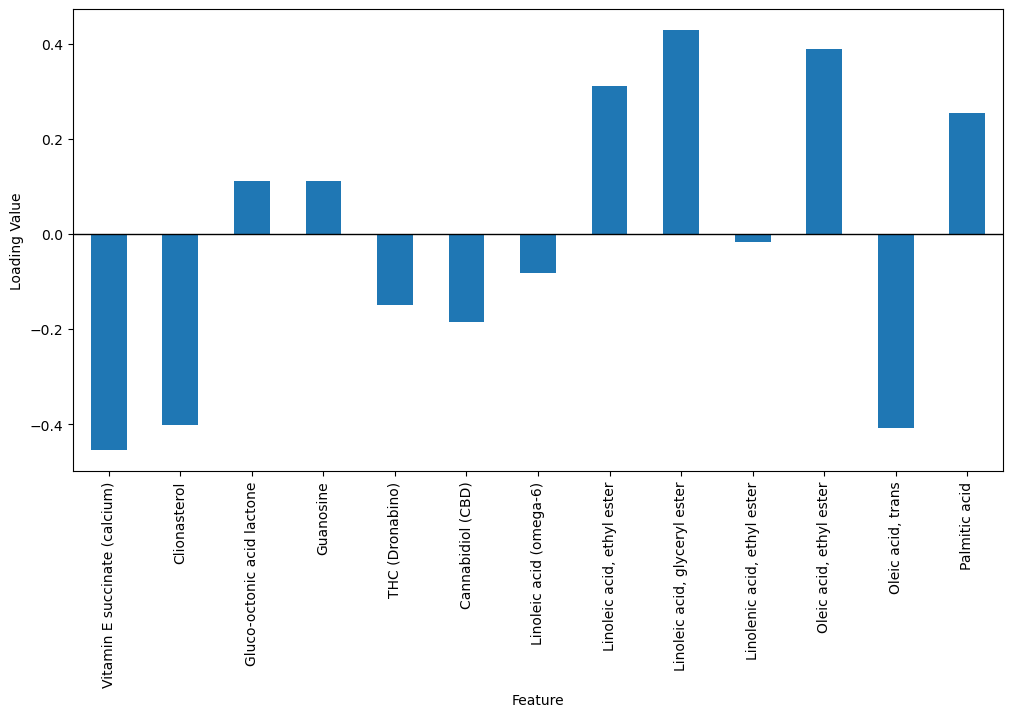

In [21]:
plt.figure(figsize=(12, 6))
X_loadings_df['PLS_Component_2'].plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.grid(False)
#plt.savefig('clustermap10p-pls-da-loading-PLS2.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
n_permutations = 1000

permuted_q2_scores = np.zeros(n_permutations)


for i in range(n_permutations):
    y_permuted = shuffle(hemp_type_encoded)  
    pls.fit(scaled_data, y_permuted)
    y_pred_permuted = pls.predict(scaled_data)
    
    permuted_q2_scores[i] = np.mean(cross_val_score(pls, scaled_data, y_permuted, cv=5, scoring='r2'))


original_q2 = Q2
num_permuted_q2 = np.sum(permuted_q2_scores >= original_q2)

In [24]:
# Calculate the p-value

p_value_q2 = np.sum(permuted_q2_scores >= original_q2) / n_permutations

print(f'Original Model Q²: {original_q2}')
print(f'Permutated Model Accuracy original: {num_permuted_q2}')
print(f'Number of permutations: {n_permutations}')
print(f'Permutation Test p-value: {p_value_q2}')

Original Model Q²: 0.3732787618898634
Permutated Model Accuracy original: 3
Number of permutations: 1000
Permutation Test p-value: 0.003


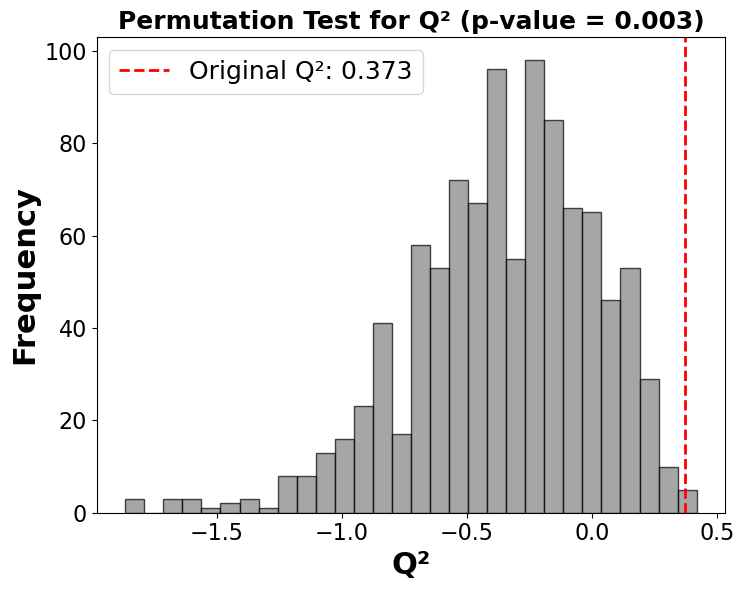

In [26]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.hist(permuted_q2_scores, bins=30, alpha=0.7, color='gray', edgecolor='black')
plt.axvline(original_q2, color='red', linestyle='--', linewidth=2, label=f'Original Q²: {original_q2:.3f}')
plt.title(f'Permutation Test for Q² (p-value = {p_value_q2})', fontsize=18, fontweight='bold')
plt.xlabel('Q²',fontsize=22, fontweight='bold')
plt.ylabel('Frequency',fontsize=22, fontweight='bold')
plt.legend(fontsize=18)
#plt.savefig('rev_fig4_left.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [27]:
def calculate_vip(pls, X):
    t = pls_da.x_scores_
    w = pls_da.x_weights_
    q = pls_da.y_loadings_

    p, h = w.shape
    vips = np.zeros(p)
    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)

    for i in range(p):
        weight = np.array([np.sum((t[:, j] ** 2) * (w[i, j] ** 2) * s[j])
                          for j in range(h)])
        vips[i] = np.sqrt(p * (weight.sum() / total_s))

    return vips

# Calculate VIP scores
vip_scores = calculate_vip(pls_da, scaled_data)
print(f"VIP Scores: {vip_scores}")

VIP Scores: [4.38229976 5.55297495 3.84763085 3.84763085 3.95795677 4.08532416
 9.34772504 3.44193811 5.16231705 3.87011137 1.8937611  4.85373375
 4.63655028]


In [28]:
feature_names = df.columns[1:]
feature_names

Index(['Vitamin E succinate (calcium)', 'Clionasterol',
       'Gluco-octonic acid lactone', 'Guanosine', 'THC (Dronabino)',
       'Cannabidiol (CBD)', 'Linoleic acid (omega-6)',
       'Linoleic acid, ethyl ester', 'Linoleic acid, glyceryl ester',
       'Linolenic acid, ethyl ester', 'Oleic acid, ethyl ester',
       'Oleic acid, trans', 'Palmitic acid'],
      dtype='object')

In [29]:
vip_score_df = pd.DataFrame({
    'VIP score': vip_scores
}, index=df_features.columns)

In [30]:
vip_score_df
print(vip_score_df)

                               VIP score
Vitamin E succinate (calcium)   4.382300
Clionasterol                    5.552975
Gluco-octonic acid lactone      3.847631
Guanosine                       3.847631
THC (Dronabino)                 3.957957
Cannabidiol (CBD)               4.085324
Linoleic acid (omega-6)         9.347725
Linoleic acid, ethyl ester      3.441938
Linoleic acid, glyceryl ester   5.162317
Linolenic acid, ethyl ester     3.870111
Oleic acid, ethyl ester         1.893761
Oleic acid, trans               4.853734
Palmitic acid                   4.636550


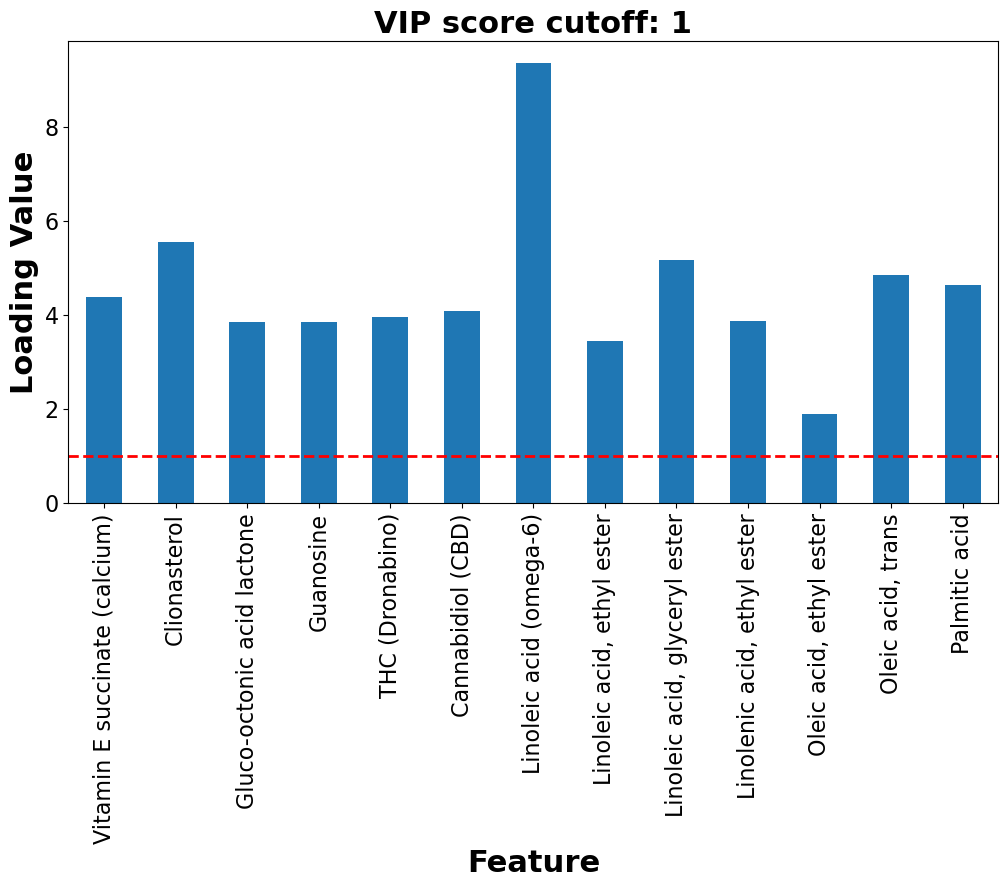

In [31]:
# Plot loadings for Vip score
plt.figure(figsize=(12, 6))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
vip_score_df['VIP score'].plot(kind='bar')
plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='VIP score cutoff: 1')
plt.xlabel('Feature', fontsize=22, fontweight='bold')
plt.ylabel('Loading Value', fontsize=22, fontweight='bold')
plt.grid(False)
plt.title('VIP score cutoff: 1', fontsize=22, fontweight='bold')
#plt.savefig('rev_fig4_right.png', dpi=300, bbox_inches='tight')
plt.show()